# **SOLVING USING FIXED FINAL TIME**

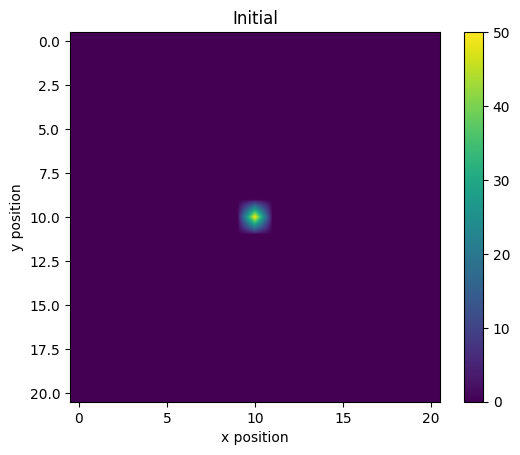

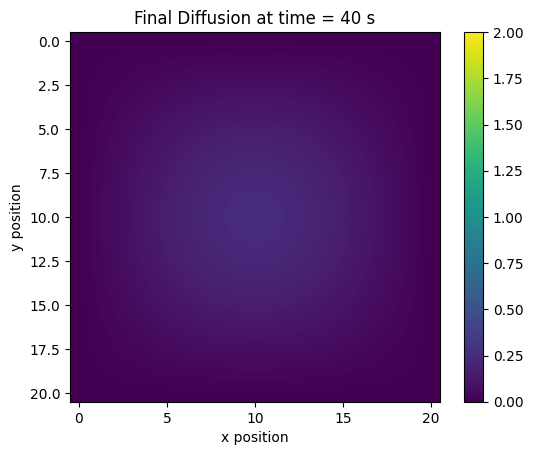

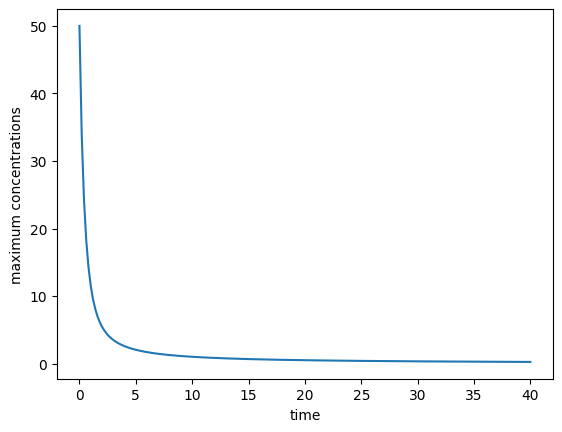

35.612665387185416  = summed concentration at all positions
rx + ry =  0.16  -> which is less than equals to 0.5, which means it is stable


In [ ]:
#importing appropriate libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#defining constants
D = 0.4 #diffusion constant
N = 21  #grid dimension
dx = 1
dy = 1
tt = 40 #total time
val = 50 #initial concentration
dt = 0.2  #time step
nt = int(tt/dt) #number of iterations based on time
maximum = [val] #initial pollutant concentration
time = np.arange(0,tt+dt,dt)  #time array

#calculating rx and ry
rx = (D*dt)/(dx**2)
ry = (D*dt)/(dy**2)

#initialising 2D - matrix
C = np.zeros((N,N))
C[N//2,N//2] = val

C0=C

#defining function for plotting
def plotting(arr2d,max=0,title=""):
  plt.imshow(arr2d,vmin = 0, vmax=max,interpolation="bilinear")
  plt.colorbar()
  plt.title(title)
  plt.xlabel("x position")
  plt.ylabel("y position")
  plt.show()

#calculating and printing each increment of diffusion
for i in range(nt):
  C_new = C.copy()
  plotting(C,2,f"Diffusion at time = {np.around(dt*(i+1),decimals=2)} s")
  display.clear_output(wait=True)      #comment this statement to see all plots printed at once

  for a in range(1,N-1):
    for b in range(1,N-1):
      C_new[a,b] = C[a,b] +rx*(C[a+1,b] - 2*C[a,b] + C[a-1,b]) + ry*(C[a,b+1] - 2*C[a,b] + C[a,b-1])

  C = C_new

  maximum.append(np.max(C))




#re-printing initial and final plot
plotting(C0,50,"Initial")
plotting(C,2,f"Final Diffusion at time = {40} s")

#printing maximum concentration w.r.t each time step
plt.plot(time,maximum)
plt.xlabel("time")
plt.ylabel("maximum concentrations")
plt.show()

#summing all concentration values
tot = np.sum(C)
print(tot, " = summed concentration at all positions")

#checking stability condition
if (rx+ry) > 0.5:
  print("rx + ry = ",np.around(rx+ry,decimals=2)," -> which is greater than 0.5, which means it is unstable")
else:
  print("rx + ry = ",np.around(rx+ry,decimals=2)," -> which is less than equals to 0.5, which means it is stable")

# **SOLVING USING ENTROPY AS A CONDITION**

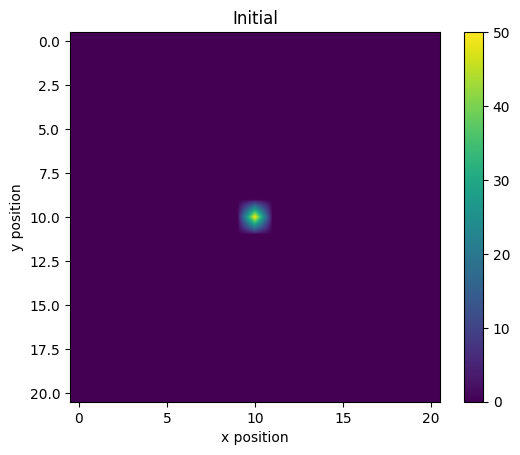

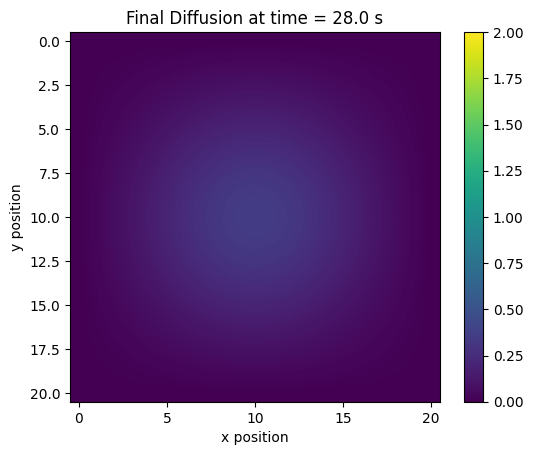

43.13  = summed concentration at all positions
rx + ry =  0.16  -> which is less than equals to 0.5, which means it is stable


In [4]:
#importing appropriate libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#defining constants
D = 0.4
N = 21
dx = 1
dy = 1
dt = 0.2
sumt = 0
val=50

#calculating rx and ry
rx = (D*dt)/(dx**2)
ry = (D*dt)/(dy**2)

#initialising 2D - matrix
C = np.zeros((N,N))
C[N//2,N//2] = val
C0=C

#computing initial entropy
si=0
sf=(-np.sum(val*(np.log(val))))


#defining function for plotting density graph
def plotting(arr2d,max=0,title=""):
  plt.imshow(arr2d,vmin = 0, vmax=max, interpolation="bilinear")
  plt.colorbar()
  plt.title(title)
  plt.xlabel("x position")
  plt.ylabel("y position")
  plt.show()

#running loop until the change in entropy in negligible aka. less than 0.001
while abs(sf-si) > 0.001:
  si=sf

  C_new = C.copy()
  plotting(C,2,f"Diffusion at time = {np.around(sumt,decimals=2)} s")
  display.clear_output(wait=True)

  for a in range(1,N-1):
    for b in range(1,N-1):
      C_new[a,b] = C[a,b] +rx*(C[a+1,b] - 2*C[a,b] + C[a-1,b]) + ry*(C[a,b+1] - 2*C[a,b] + C[a,b-1])


  C = C_new

  #computing entropy at next increment
  filterarray = C>0
  nonzero = C[filterarray]
  sf=(-np.sum(nonzero*(np.log(nonzero))))

  sumt+=dt



#re-printing initial and final plot
plotting(C0,50,"Initial")
plotting(C,2,f"Final Diffusion at time = {np.around(sumt,decimals=2)} s")

#summing all concentration values
tot = np.sum(C)
print(np.around(tot, decimals=2), " = summed concentration at all positions")

#checking stability condition
if (rx+ry) > 0.5:
  print("rx + ry = ",np.around(rx+ry,decimals=2)," -> which is greater than 0.5, which means it is unstable")
else:
  print("rx + ry = ",np.around(rx+ry,decimals=2)," -> which is less than equals to 0.5, which means it is stable")
